week 2

In [3]:
# imports
!pip install statsmodels
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.neighbors import NearestNeighbors


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
hw2_df = pd.read_csv('homework_2.1.csv')
hw2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   time        100 non-null    int64  
 2   G1          100 non-null    float64
 3   G2          100 non-null    float64
 4   G3          100 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 4.0 KB


In [5]:
hw2_df.head()

,Unnamed: 0,time,G1,G2,G3
0,0,0,0.882026,1.441575,0.065409
1,1,1,0.210079,-0.163880,0.140310
2,2,2,0.509369,-0.115242,0.819830
3,3,3,1.150447,1.014698,0.607632
4,4,4,0.973779,-0.046562,0.610066


In [6]:
hw2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   time        100 non-null    int64  
 2   G1          100 non-null    float64
 3   G2          100 non-null    float64
 4   G3          100 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 4.0 KB


In [7]:
# questions 1 and 2
import statsmodels.formula.api as smf

# --- reshape the data from wide to long format ---
# pd.melt to transform the G1, G2, and G3 columns into a single 'outcome' col with a corresponding 'group' col

long_df = pd.melt(hw2_df,
                  id_vars=['time'],
                  value_vars=['G1', 'G2', 'G3'],
                  var_name='group',
                  value_name='outcome')

print("--- Reshaped Data Head ---")
print(long_df.head())
print("\n")


# --- define and fit the fixed-effects model ---
# OLS function from statsmodels
# 'outcome ~ time + C(group)' :
# 1. 'time': will give us the single linear coefficient
# 2. 'C(group)': treats the 'group' column as a categorical variable

model = smf.ols('outcome ~ time + C(group)', data=long_df).fit()


# --- print the regression summary ---

print("--- Regression Results ---")
print(model.summary())

# --- interpreting results ---

# - Intercept: the fixed effect for the baseline group (usually G1).
# - C(group)[T.G2]: difference in the fixed effect between G2 and G1.
# - C(group)[T.G3]: difference in the fixed effect between G3 and G1.
# - time: single linear coefficient for the 'time' variable.
#
# to get the absolute fixed effect for G2, add:
# Intercept + C(group)[T.G2]

--- Reshaped Data Head ---
   time group   outcome
0     0    G1  0.882026
1     1    G1  0.210079
2     2    G1  0.509369
3     3    G1  1.150447
4     4    G1  0.973779


--- Regression Results ---
                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     44.55
Date:                Mon, 08 Sep 2025   Prob (F-statistic):           8.72e-24
Time:                        18:29:51   Log-Likelihood:                -216.89
No. Observations:                 300   AIC:                             441.8
Df Residuals:                     296   BIC:                             456.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
          

In [8]:
hw22_df = pd.read_csv('homework_2.2.csv')
hw22_df.info()
hw22_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   X           10000 non-null  int64  
 2   Y           10000 non-null  float64
 3   Z           10000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


,Unnamed: 0,X,Y,Z
0,0,0,1.182435,-0.725820
1,1,0,2.714474,0.563476
2,2,0,0.077612,-0.435632
3,3,0,-0.154449,-0.104553
4,4,0,22.298992,-2.321273


Running 1000 bootstrap simulations...
Simulation complete.


--- Bootstrap Simulation Results for Outcome 'Y' ---
Average Treatment Effect: 2.9255
95% Confidence Interval: [2.5873, 3.2910]


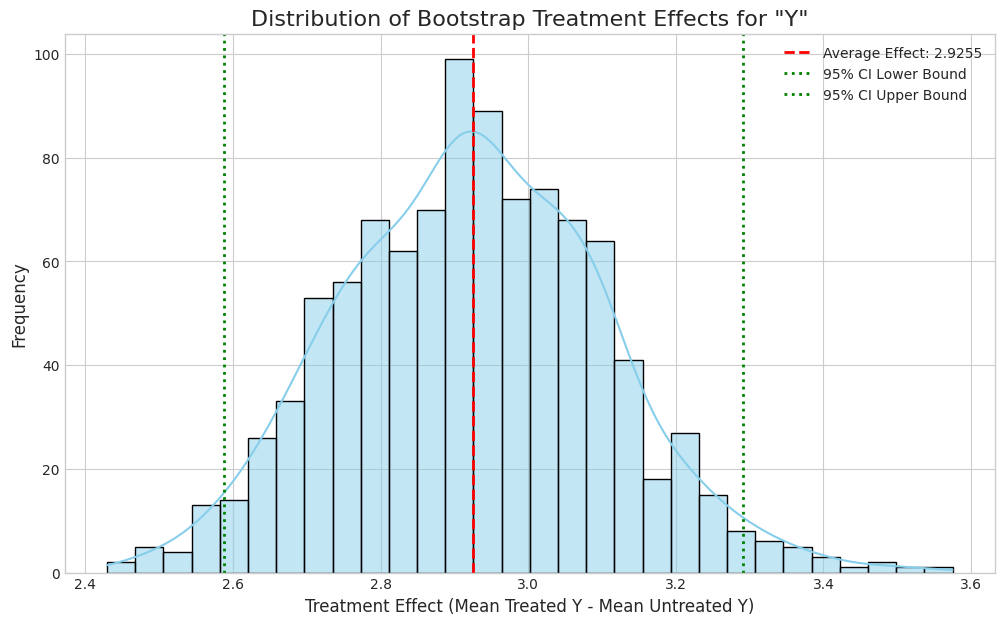

In [9]:
# questions 3-4
import matplotlib.pyplot as plt
import seaborn as sns


# assuming X is treatment variable in hw2.2!!


# --- bootstrap simulation ---
# number of bootstrap samples to create = 1000
n_simulations = 1000
treatment_effects = []

print(f"Running {n_simulations} bootstrap simulations...")

for i in range(n_simulations):
    # sampling with replacement from the original dataframe.
    # 'frac=1' means bootstrap sample will have the same size as the original
    bootstrap_sample = hw22_df.sample(frac=1, replace=True)

    # separate the bootstrap sample into treated (X=1) and untreated (X=0) groups
    treated = bootstrap_sample[bootstrap_sample['X'] == 1]
    untreated = bootstrap_sample[bootstrap_sample['X'] == 0]

    # calculate the difference in means for the outcome 'Y'
    # include a check to ensure both groups exist in the bootstrap sample to avoid errors
    if not treated.empty and not untreated.empty:
        mean_treated = treated['Y'].mean()
        mean_untreated = untreated['Y'].mean()
        effect = mean_treated - mean_untreated
        treatment_effects.append(effect)

print("Simulation complete.")
print("\n")


# --- analyze and display results ---

treatment_effects = np.array(treatment_effects)

# average treatment effect from all simulations
avg_effect = np.mean(treatment_effects)

# 95% confidence interval for the treatment effect
# found by taking the 2.5th and 97.5th percentiles of the results
confidence_interval = np.percentile(treatment_effects, [2.5, 97.5])

print(f"--- Bootstrap Simulation Results for Outcome 'Y' ---")
print(f"Average Treatment Effect: {avg_effect:.4f}")
print(f"95% Confidence Interval: [{confidence_interval[0]:.4f}, {confidence_interval[1]:.4f}]")


# --- visualize the distribution of treatment effects ---
# histogram
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))

sns.histplot(treatment_effects, kde=True, bins=30, color='skyblue', edgecolor='black')

# add lines for the average effect and confidence interval for clarity.
plt.axvline(avg_effect, color='red', linestyle='--', linewidth=2, label=f'Average Effect: {avg_effect:.4f}')
plt.axvline(confidence_interval[0], color='green', linestyle=':', linewidth=2, label='95% CI Lower Bound')
plt.axvline(confidence_interval[1], color='green', linestyle=':', linewidth=2, label='95% CI Upper Bound')

plt.title('Distribution of Bootstrap Treatment Effects for "Y"', fontsize=16)
plt.xlabel('Treatment Effect (Mean Treated Y - Mean Untreated Y)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

In [10]:
# finding variance for prob 4
variance_of_effect = np.var(treatment_effects)
print(f"Variance of the Treatment Effect: {variance_of_effect:.4f}")

Variance of the Treatment Effect: 0.0313


Running 1000 bootstrap simulations for linear regression...
Simulation complete.


--- Bootstrap Results (Linear Regression) for 'Y' ---
Skewness of the Treatment Effect: -0.0145
Average Treatment Effect: 2.9066
95% CI: [2.5793, 3.2530]


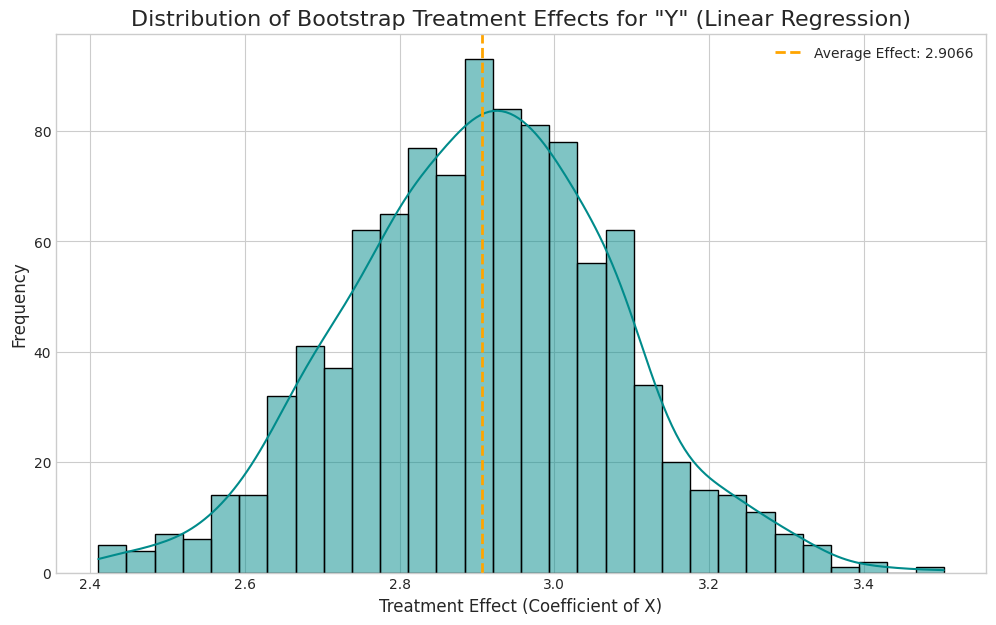

In [11]:
# linear regression for problem 5

from scipy.stats import skew


# --- bootstrap w linear regression ---
n_simulations = 1000
treatment_effects_regression = []

print(f"Running {n_simulations} bootstrap simulations for linear regression...")

for i in range(n_simulations):
    # sampling with replacement
    bootstrap_sample = hw22_df.sample(frac=1, replace=True)

    # fit a simple linear regression model: Y = intercept + B1*X
    # the coefficient B1 for 'X' is the measured treatment effect.
    model = smf.ols('Y ~ X', data=bootstrap_sample).fit()
    
    # store the coefficient for the treatment variable 'X'.
    regression_effect = model.params.get('X', np.nan)
    treatment_effects_regression.append(regression_effect)


print("Simulation complete.")
print("\n")


# --- analyze and display results ---
# convert the list of effects to a NumPy array, removing any potential NaNs
treatment_effects_regression = np.array(treatment_effects_regression)
treatment_effects_regression = treatment_effects_regression[~np.isnan(treatment_effects_regression)]


# calculate the skewness of the treatment effect distribution
skewness_reg = skew(treatment_effects_regression)

# calculate the average and confidence interval
avg_effect_reg = np.mean(treatment_effects_regression)
confidence_interval_reg = np.percentile(treatment_effects_regression, [2.5, 97.5])


print(f"--- Bootstrap Results (Linear Regression) for 'Y' ---")
print(f"Skewness of the Treatment Effect: {skewness_reg:.4f}")
print(f"Average Treatment Effect: {avg_effect_reg:.4f}")
print(f"95% CI: [{confidence_interval_reg[0]:.4f}, {confidence_interval_reg[1]:.4f}]")


# --- visualize the distribution of treatment effects ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))

sns.histplot(treatment_effects_regression, kde=True, bins=30, color='darkcyan', edgecolor='black')

plt.axvline(avg_effect_reg, color='orange', linestyle='--', linewidth=2, label=f'Average Effect: {avg_effect_reg:.4f}')

plt.title('Distribution of Bootstrap Treatment Effects for "Y" (Linear Regression)', fontsize=16)
plt.xlabel('Treatment Effect (Coefficient of X)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()